In [8]:
import pickle
import matplotlib as plot
import matplotlib.pyplot as plt
import numpy as np

In [72]:
log_list = [ "logs/04:20:45epochs-10_size-600__additionals.pickle",
             "logs/04:26:11epochs-10_size-600__additionals.pickle",
             "logs/04:33:21epochs-10_size-600__additionals.pickle",
             "logs/04:45:33epochs-10_size-600__additionals.pickle",
             "logs/05:02:33epochs-10_size-600__additionals.pickle",
             "logs/05:10:10epochs-10_size-600__additionals.pickle",
             "logs/05:32:37epochs-10_size-600__additionals.pickle"]

In [73]:
req_rounds_sum = np.zeros(20)
req_rounds_min = np.full(20, np.inf)
req_rounds_max = np.full(20, -np.inf)
for fn in log_list:
    log = np.array(pickle.load( open( fn, "rb" ) )['req_rounds'])
    req_rounds_sum = req_rounds_sum + np.array(log)
    req_rounds_min[req_rounds_min > log] = log[req_rounds_min > log]
    req_rounds_max[req_rounds_max < log] = log[req_rounds_max < log]
req_rounds_sum /= len(log_list)

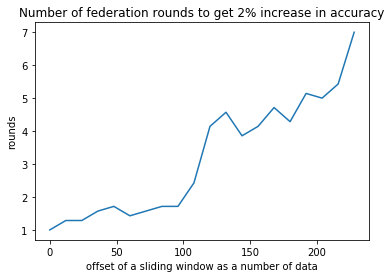

In [79]:
plt.plot(np.arange(20)*12, np.array(req_rounds_sum))
# plt.plot(np.arange(20)*12, np.array(req_rounds_min))
# plt.plot(np.arange(20)*12, np.array(req_rounds_max))
# ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
# plt.title("Required number of federation rounds to get 2% accuracy increase - averaged from {} experiments".format(len(log_list)))
plt.title("Number of federation rounds to get 2% increase in accuracy")
plt.ylabel("rounds")
plt.xlabel("offset of a sliding window as a number of data")
plt.savefig("demo_fig_2.pdf")
plt.show()

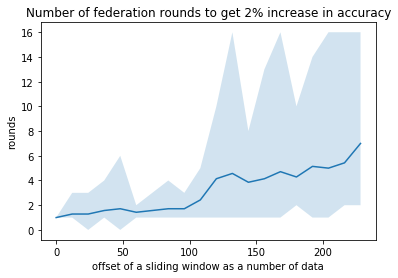

In [75]:
fig, ax = plt.subplots()
ax.plot(np.arange(20)*12, np.array(req_rounds_sum), '-')
plt.title("Number of federation rounds to get 2% increase in accuracy")
plt.ylabel("rounds")
plt.xlabel("offset of a sliding window as a number of data")
ax.fill_between(np.arange(20)*12, np.array(req_rounds_min), np.array(req_rounds_max), alpha=0.2)


In [49]:
log = pickle.load( open( "logs/04:45:33epochs-10_size-600__additionals.pickle", "rb" ) )

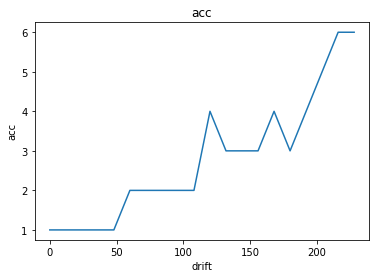

In [50]:
plt.plot(np.arange(20)*12, np.array(log['req_rounds']))
plt.title("acc")
plt.ylabel("acc")
plt.xlabel("drift")
plt.show()

In [80]:
addlog = pickle.load( open( "logs/15:03:34epochs-10_size-600__additionals.pickle", "rb" ) )

In [81]:
addlog

{'l2_dist': [array([0.25104818, 0.29700458, 0.42798239, 0.60927093, 0.74465382,
         0.87447804, 0.97730082, 1.13218415, 1.24322128, 1.3557508 ,
         1.38119173]),
  array([0.25338861, 0.31260741, 0.42381081, 0.56880939, 0.7573781 ,
         0.85125697, 1.01397049, 1.1055007 , 1.22544885, 1.30118477,
         1.38514555])],
 'req_rounds': [array([ 1.,  2.,  2.,  2.,  4.,  5.,  4.,  5.,  7., 16., 16.]),
  array([ 1.,  1.,  2.,  2.,  3.,  2.,  4.,  3.,  5.,  8., 16.])]}

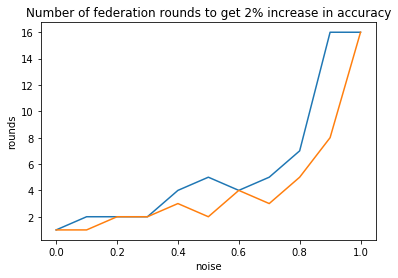

In [89]:
plt.plot(np.arange(11)/10, np.array(addlog['req_rounds'][0]))
plt.plot(np.arange(11)/10, np.array(addlog['req_rounds'][1]))
plt.title("Number of federation rounds to get 2% increase in accuracy")
plt.ylabel("rounds")
plt.xlabel("noise")
plt.show()